# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[23 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import (
    classification_report, 
    precision_recall_fscore_support, 
    roc_auc_score, 
    roc_curve
)
import torch
import torch.nn as nn
import torch.optim as optim


In [11]:
df = pd.read_csv('creditcard.csv')
print(f"Dataset shape: {df.shape}")
print(f"Number of fraudulent transactions: {df['Class'].sum()}")

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData preparation completed.")


Dataset shape: (284807, 31)
Number of fraudulent transactions: 492

Data preparation completed.


In [12]:
def evaluate_model(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    auc = roc_auc_score(y_true, y_pred)
    print(f"\n{model_name} Results:")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_true, y_pred, target_names=["Normal", "Fraud"]))
    return auc


In [13]:
print("\nTraining Isolation Forest...")
iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_train_scaled)
y_pred_if = iso_forest.predict(X_test_scaled)
y_pred_if = [1 if x == -1 else 0 for x in y_pred_if]
evaluate_model(y_test, y_pred_if, "Isolation Forest")



Training Isolation Forest...

Isolation Forest Results:
Precision: 0.3906, Recall: 0.2551, F1-Score: 0.3086, AUC: 0.6272
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.39      0.26      0.31        98

    accuracy                           1.00     56962
   macro avg       0.69      0.63      0.65     56962
weighted avg       1.00      1.00      1.00     56962



0.6272080969416466

--------------------------------------
Isolation Forest зміг знайти деякі шахрайські транзакції, але працює далеко не ідеально. Його Recall (25.51%) свідчить про те, що лише чверть шахрайських операцій були ідентифіковані. Високий Precision (39.06%) означає, що з передбачених як шахрайські транзакції майже 40% були дійсно шахрайськими. Але загальний AUC (62.72%) свідчить про те, що модель не є хорошою


--------------------------------------

In [15]:
print("\nTraining One-Class SVM...")
ocsvm = OneClassSVM(kernel='rbf', nu=0.001)
ocsvm.fit(X_train_scaled)
y_pred_ocsvm = ocsvm.predict(X_test_scaled)
y_pred_ocsvm = [1 if x == -1 else 0 for x in y_pred_ocsvm]
evaluate_model(y_test, y_pred_ocsvm, "One-Class SVM")



Training One-Class SVM...

One-Class SVM Results:
Precision: 0.0722, Recall: 0.4694, F1-Score: 0.1252, AUC: 0.7295
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56864
       Fraud       0.07      0.47      0.13        98

    accuracy                           0.99     56962
   macro avg       0.54      0.73      0.56     56962
weighted avg       1.00      0.99      0.99     56962



0.7294972680968843

--------------------------------------
One-Class SVM демонструє кращий Recall (46.94%), тобто майже половина шахрайських транзакцій були знайдені, але це досягається значно нижчим Precision (7.22%), що означає велику кількість помилкових спрацьовувань (хибно позитивних результатів). Це свідчить про те, що модель схильна "перестаратися" у виявленні шахрайських операцій, жертвуючи точністю

--------------------------------------

In [16]:
print("\nTraining Local Outlier Factor...")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
y_pred_lof = lof.fit_predict(X_test_scaled)
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]
evaluate_model(y_test, y_pred_lof, "Local Outlier Factor")



Training Local Outlier Factor...

Local Outlier Factor Results:
Precision: 0.0351, Recall: 0.0204, F1-Score: 0.0258, AUC: 0.5097
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.04      0.02      0.03        98

    accuracy                           1.00     56962
   macro avg       0.52      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962



0.5097204716157707

--------------------------------------
LOF працює майже як випадкове вгадування, про що свідчить AUC близько 50%. Recall (2.04%) надзвичайно низький, тобто модель майже не виявляє шахрайські транзакції. Водночас, Precision (3.51%) дуже низька, що свідчить про високу кількість хибних позитивних результатів. Ця модель є найгіршою з трьох

--------------------------------------

In [17]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [21]:
print("\nTraining Autoencoder...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(X_train_scaled.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

epochs = 50
batch_size = 256
model.train()
for epoch in range(epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch = X_train_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Training Autoencoder...
Epoch [10/50], Loss: 0.0670
Epoch [20/50], Loss: 0.0396
Epoch [30/50], Loss: 0.0268
Epoch [40/50], Loss: 0.0199
Epoch [50/50], Loss: 0.0245


--------------------------------------

Автоенкодер тренувався протягом 50 епох, і з кожною епохою значення Loss зменшувалося, що вказує на поступове вдосконалення моделі в реконструкції нормальних транзакцій

--------------------------------------

In [19]:
model.eval()
with torch.no_grad():
    X_test_reconstructed = model(X_test_tensor).cpu().numpy()

test_mse = np.mean(np.power(X_test_scaled - X_test_reconstructed, 2), axis=1)
fpr, tpr, thresholds = roc_curve(y_test, test_mse)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

y_pred_autoencoder = (test_mse > optimal_threshold).astype(int)
evaluate_model(y_test, y_pred_autoencoder, "Autoencoder")



Autoencoder Results:
Precision: 0.0211, Recall: 0.8878, F1-Score: 0.0411, AUC: 0.9083
              precision    recall  f1-score   support

      Normal       1.00      0.93      0.96     56864
       Fraud       0.02      0.89      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.93      0.96     56962



0.908319025415456

--------------------------------------

Результати показують, що автоенкодер добре знаходить шахрайські транзакції, але при цьому часто помилково позначає нормальні транзакції як шахрайські

--------------------------------------

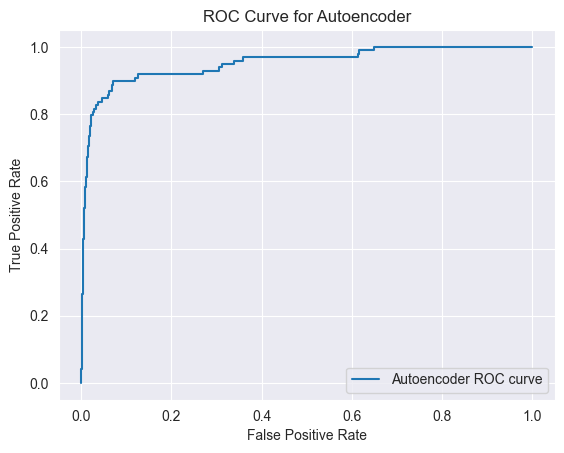

In [20]:
plt.plot(fpr, tpr, label="Autoencoder ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Autoencoder")
plt.legend()
plt.show()


--------------------------------------

Графік ROC автокодера показує високу ефективність моделі з великою площею під кривою. Модель добре розрізняє класи з низьким рівнем помилкових спрацьовувань, що свідчить про її придатність для задач виявлення аномалій.

--------------------------------------